# **BIG MART SALES PREDICTION**


## **The Problem Statement**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**The aim is to build a predictive model and find out the sales of each product at a particular store.**

## **Importing Required Libraries**

In [198]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

In [199]:
train_dataset = pd.read_csv('data\Train.csv')
test_dataset = pd.read_csv('data\Test.csv')

In [200]:
train_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [201]:
test_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [202]:
print(train_dataset.shape)
print(test_dataset.shape)

(8523, 12)
(5681, 11)


We have to predict 'Item_Outlet_Sales' for test data.
So for the further Exporartory Data Analysis we will merge the train & test data

In [203]:
# In the test dataset we don't have 'Item_Outlet_Sales' column. So for the Exporatory Data Analysis we will create a new column as 'Item_Outlet_Sales' in test data. 
#And further we will fill 0 for all the observations.


test_dataset['Item_Outlet_Sales'] = 0
merged_data = pd.concat([train_dataset, test_dataset], sort=False,axis=0, ignore_index=True)

print(train_dataset.shape, test_dataset.shape, merged_data.shape)

(8523, 12) (5681, 12) (14204, 12)


In [204]:
# Let us print records of the dataset
merged_data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales  
0      Supermarket Type1          3735.1380  
1      Supermarket Type2           443.4228  
2      Supermarket Type1          2097.2700  
3          Grocery Store           732.3800  
4      Supermarket Type1           994.7052  
...                  ...                ...  
14199  Supermarket Type1             0.0000  
14200  Supermarket Type2             0.0000  
14201  Supermarket Type1             0.0000  
14202  Supermarket Type1             0.0000  
14203  Supermarket Type1             0.0000  

[14204 rows x 12 columns]

The dataset contains 014204 rows and 12 columns. Each row of the dataset contains information about unique product. 

Our objective is to find a way to predict/estimate the value in the "Item_Outlet_Sales" column using the values in the other columns. If we can do so for the historical data, then we should able to predict sales for new outlets too, simply by asking for information like their 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
'Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'.

In [205]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


'Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year' and 'Item_Outlet_Sales' are numerical features, whereas 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type' and "Outlet_Sales' are objects.

In [206]:
#statistical information about the dataset(min, max, mean, count etc.)
merged_data.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         1308.865489  
std          1699.791423  
min             0.000000  
25%             0.000000  
50%           559.272000  
75%          2163.184200  
max         13086.964800

The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "Outlet_Sales" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

In [207]:
#categorical features information(unique, top, frequency etc.)
merged_data.describe(include="O")

Item_Identifier Item_Fat_Content              Item_Type  \
count            14204            14204                  14204   
unique            1559                5                     16   
top              FDW47          Low Fat  Fruits and Vegetables   
freq                10             8485                   2013   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count              14204       10188                14204              14204  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                1559        4655                 5583               9294

In [208]:
# the categorical features from the dataset
categorical_features = merged_data.select_dtypes(include = ['O'])
categorical_features.head()

Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
3         NaN               Tier 3      Grocery Store  
4        High               Tier 3  Supermarket Type1

In [209]:
# the numerical features from the dataset
numrical_features = merged_data.select_dtypes(exclude = ['O'])
numrical_features.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

We can see that dataset has 4 numerical features and 7 categorical features.

In [210]:
# find unique labels in each categorical feature.
for feature in categorical_features:
    print('The unique label in {} : {}'.format(feature, categorical_features[feature].unique()))
    print('---------------------------------------------------------')

The unique label in Item_Identifier : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
---------------------------------------------------------
The unique label in Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
---------------------------------------------------------
The unique label in Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
---------------------------------------------------------
The unique label in Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
---------------------------------------------------------
The unique label in Outlet_Size : ['Medium' nan 'High' 'Small']
---------------------------------------------------------
The unique label in Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
---------------------

We can find that thee is a difference in the representation of the categories of the Item_Fat_Content variable. to correct this we ('LF, 'low fat', 'Low Fat') --> 'Low Fat' and ('reg', 'Regular') --> 'Regular'

In [211]:
# First we will replace "LF" to "Low Fat" , "low fat" to "Low Fat" and "reg" to "Regular"
merged_data['Item_Fat_Content'] = merged_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
merged_data['Item_Fat_Content'].value_counts()


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

## Exploratory Analysis and Visualization

Visualizing the distribution of values in some columns of the dataset, and the relationships between "Item_Outlet_Sales" and other columns.

**Target: Item Fat Content**

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

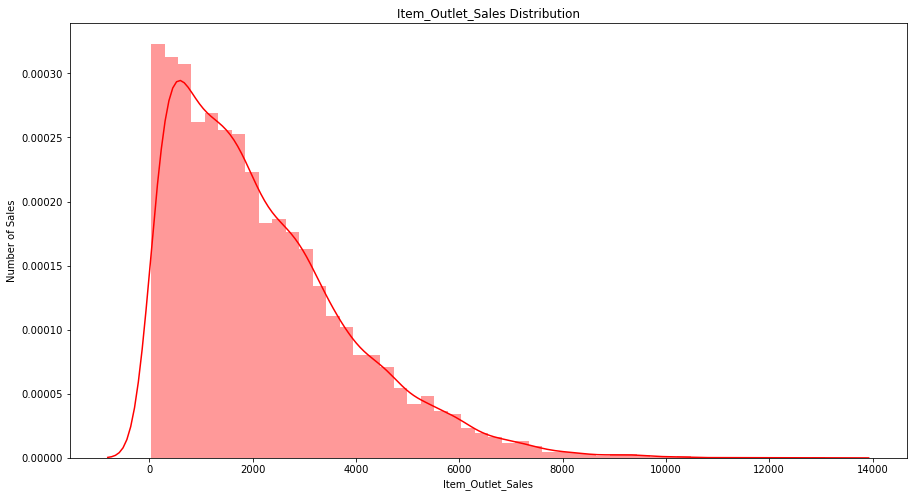

In [212]:
# Target Variable
plt.figure(figsize=(15,8))
sns.distplot(train_dataset.Item_Outlet_Sales, color = "red")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

# Item_Outlet_Sales is skewed to the left 

**1. Item Fat Content**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

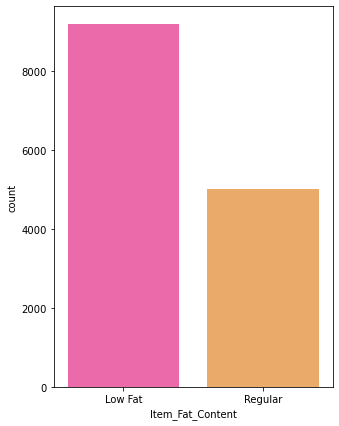

In [213]:
plt.figure(figsize=(5,7))
sns.countplot('Item_Fat_Content', data=merged_data, palette='spring')

**Observation**

- The most sold items from Bigmart are Low Fat.

**2. Item Type**

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

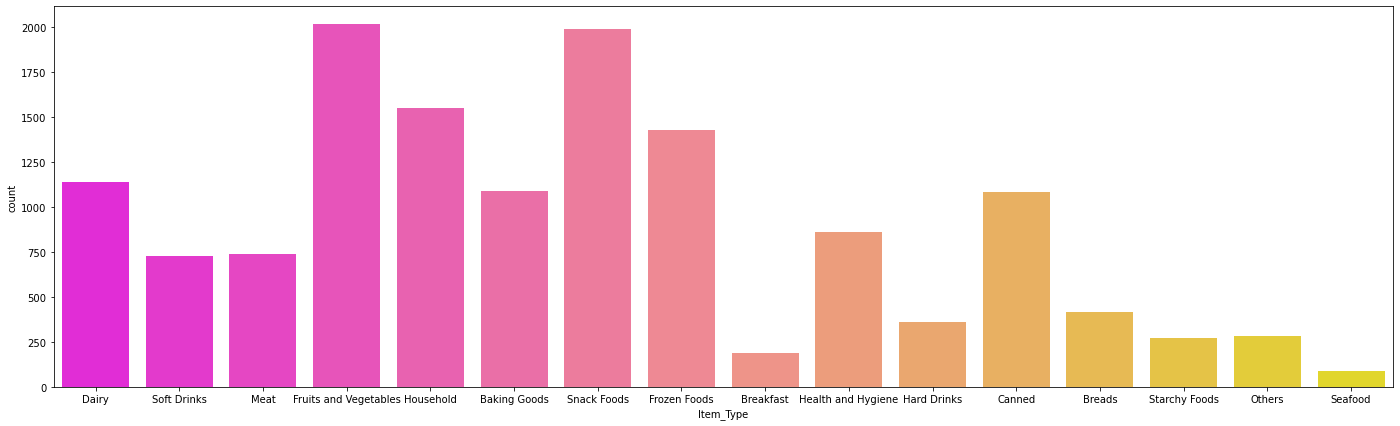

In [214]:
plt.figure(figsize=(24,7))
sns.countplot('Item_Type', data=merged_data, palette='spring')

**Observation**

- Fruits & vegetables and Snack foods looks most popular items. 

**3. Outlet Size**

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

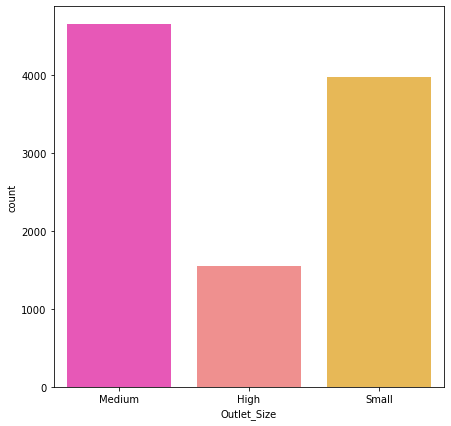

In [215]:
plt.figure(figsize= (7,7))
sns.countplot('Outlet_Size', data=merged_data, palette= 'spring')

**Observation**

- The Bigmarts medium size Outlets are in maximum numbers.

**4. Outlet Location Type**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

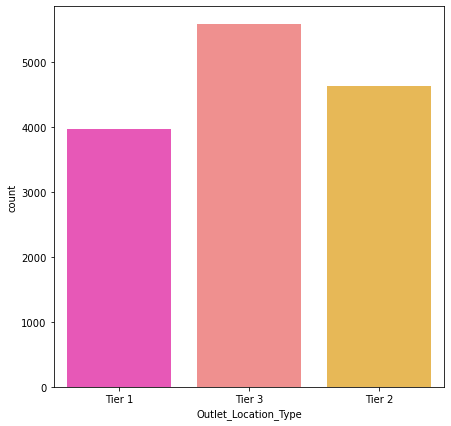

In [216]:
plt.figure(figsize=(7,7))
sns.countplot('Outlet_Location_Type', data=merged_data, palette= 'spring')

**Observation**

- The maximum number of outlets in the Tier 3 cities.

**5. Outlet Type**

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

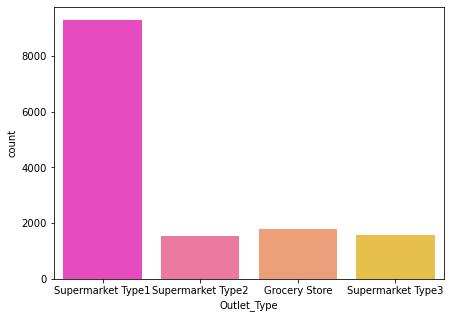

In [217]:
# Visualise count plot of "Outlet_Type"
plt.figure(figsize=(7,5))
sns.countplot('Outlet_Type', data=merged_data, palette= 'spring')

**Observation**

- The huge number of outlets are of Supermarket Type1.

### **B. Bivariate Analysis**

### Numerical Features Analysis

#### 1. Item_Weight

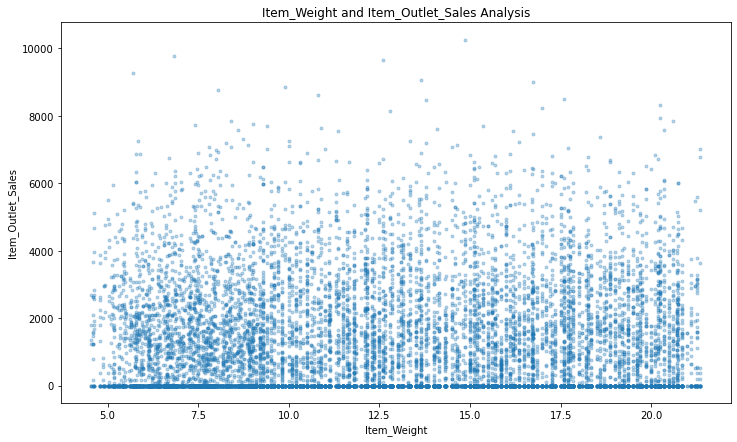

In [218]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(merged_data.Item_Weight, merged_data["Item_Outlet_Sales"],'.', alpha = 0.3)

The data is very spreaded, no specific pattern.

#### 2. Item_Visibility

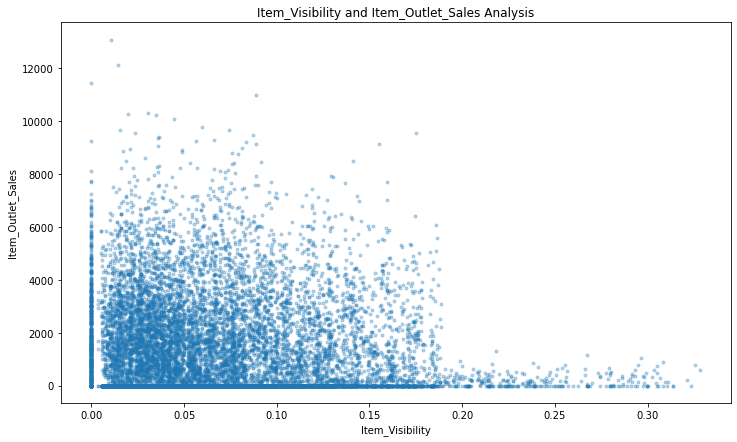

In [219]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(merged_data.Item_Visibility, merged_data["Item_Outlet_Sales"],'.', alpha = 0.3)

Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.

#### 3. Item_MRP

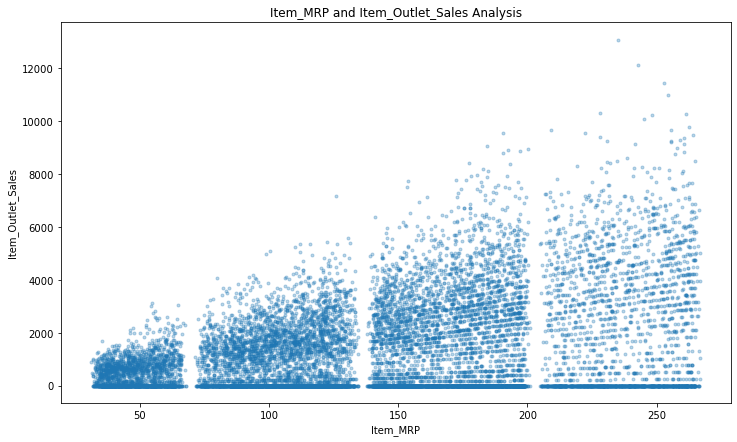

In [220]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(merged_data.Item_MRP, merged_data["Item_Outlet_Sales"],'.', alpha = 0.3)

From the above plot, items with higher MRP tend to sell better in most cases.

### Categorical Features Analysis

**1. Item_Fat_Content**

In [221]:
# "Item_Outlet_Sale" based on "Item_Fat_Content"
fig = px.pie(merged_data, names='Item_Fat_Content', values='Item_Outlet_Sales', width=500, height=500,
            title= 'Outlet Sales by Item Fat Content')
fig.show()

**Observations**

The 'Item Outles' sales are higher for Low Fat as compared to Regular Item types.

**2.Item_Type**

In [222]:
# Now visualise the "Item_Outlet_Sale" based on "Item_Type"
fig = px.pie(merged_data, names='Item_Type', values='Item_Outlet_Sales', title= 'Sales by Item Type')
fig.show()

**Observation**

> About 50% of the total sales was by four item type categories(Fruites & vegetables, Snack Foods, Household, Frozen Foods).

> Some of the item types have very low sales as Seafood sale was 0.80% , Breakfast sale was 1.25%, Others 1.75% and Starchy foods was 1.89% of the total sales.

**3. Outlet Identifier**

In [223]:
fig = px.pie(merged_data, names='Outlet_Identifier', values="Item_Outlet_Sales", width=500, height=500, title="Sales by Outlet Identifier")
fig.show()

**Observation**
> we can say that the sale of Outlet (OUT027) has near about 19% of the total sales.

> outlets OUT010 & OUT019 have thelowest sales (0.97% & 1.01% of the totatl sales).

**4. Outlet_Size**

In [224]:
# Now visualise the "Item_Outlet_Sale" by "Outlet_Size" feature
fig = px.pie(merged_data, names='Outlet_Size', values='Item_Outlet_Sales', title= 'Sales by Outlet_Size', 
width=500, height=500)
fig.show()

**Observation**

> About 40% of the sale was throgh the medium size outlets.

**5. Outlet_Location_Type**

In [225]:
# Now visualise the "Item_Outlet_Sale" by "Outlet_Location_Type" feature
fig = px.pie(data_frame=merged_data, names='Outlet_Location_Type', values='Item_Outlet_Sales', width=500, height=500,
            title= "Sales by Outlet Location Type")
fig.show()

**Observation**

From the above graph we can see that maximum number of the total sale is through Tier3 cities.

**6. Outlet_Type**

In [226]:
fig = px.pie(data_frame=merged_data, names='Outlet_Type', values='Item_Outlet_Sales', width=800, height=500,
            title = "Sales by Outlet Type")
fig.show()

**Observation**

> We can see that about 70% of the total sale is through Supermarket Type1 outlet.

> Grocery store sale was very low sale as comapred to other outlet types.

### **C. Multivariate Analysis**

In [227]:
fig = px.box(merged_data, x="Item_Type", y="Item_Outlet_Sales", color="Item_Fat_Content",
            title="Sales by Item Fat Content and Item Type",
            width=800, height=400,
            )
fig.show()

In [228]:
fig = px.histogram(merged_data, x="Item_Type", y="Item_Outlet_Sales", color="Outlet_Location_Type",
            title="Sales by Outlet Location Type and Item Type",
            width=800, height=400)

fig.show()

From the above chart we can see that, the Breakfast, Others, Starchy Foods, Breads and Seafoods item types have very low sale through all Tier 1, Tier 2 and Tier 3 cities.

In [229]:
avg_vis=merged_data['Item_Visibility'].groupby(merged_data['Outlet_Type']).mean()


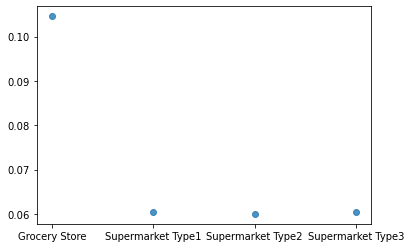

In [230]:
fig = plt.plot(avg_vis, 'o', alpha = 0.8)

Looking at the average visibility of items in each shop,confirms our earlier suspicion that grocery stores have a smaller selection of wares on offer, i.e. the average visibility per item is higher than in supermarkets.

In [231]:
# Creating a feature that describes the no of years the outlet has been in existence.
merged_data['Num_Year'] = (2013 - merged_data.Outlet_Establishment_Year)
merged_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Num_Year  
0  Supermarket Type1          3735.1380        14  
1  Supermarket Type2           443.4228         4  
2  Supermarket Type1          2097.2700        14  
3      Grocery Store           732.3800        15  
4  Supermarket Type1           994.7052        26

In [232]:
fig = px.histogram(merged_data, x="Num_Year", y="Item_Outlet_Sales",
            title="Num Year Vs Item Outlet Sales", width=800, height=400)

fig.show()

## **Data Cleaning**

In [233]:
merged_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Num_Year                        0
dtype: int64

In [234]:
merged_data.isnull().sum()/merged_data.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Num_Year                      0.000000
dtype: float64

We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

**1. Item Weight**

Box Plot shows no "Outliers" and hence we can impute the missing numerical values with "Mean".

In [235]:
merged_data['Item_Weight'] = merged_data['Item_Weight'].fillna(merged_data['Item_Weight'].mean())

In [236]:
merged_data['Item_Weight'].isnull().sum()

0

We have succesfully imputed the missing values from the column Item_Weight.

**2. Outlet Size**

In [237]:
merged_data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [238]:
merged_data['Outlet_Size'] = merged_data['Outlet_Size'].fillna(merged_data['Outlet_Size'].mode()[0])

In [239]:
merged_data['Outlet_Size'].isna().sum()

0

We have succesfully imputed the missing values from the column Outlet_Size.

In [240]:
merged_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Num_Year  
0  Supermarket Type1          3735.1380        14  
1  Supermarket Type2           443.4228         4  
2  Supermarket Type1          2097.2700        14  
3      Grocery Store           732.3800        15  
4  Supermarket Type1           994.7052        26

## **Correlation**

In [241]:
merged_data.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.013641  0.033002   
Item_Visibility              -0.013641         1.000000 -0.006351   
Item_MRP                      0.033002        -0.006351  1.000000   
Outlet_Establishment_Year     0.000462        -0.083678  0.000141   
Item_Outlet_Sales             0.016425        -0.075008  0.342781   
Num_Year                     -0.000462         0.083678 -0.000141   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                 0.000462           0.016425   
Item_Visibility                            -0.083678          -0.075008   
Item_MRP                                    0.000141           0.342781   
Outlet_Establishment_Year                   1.000000          -0.029489   
Item_Outlet_Sales                          -0.029489           1.000000   
Num_Year                                   -1.000000           0.029489   

                           Num_Year  
Item_Weight               -0.000462  
Item_Visibility            0.083678  
Item_MRP                  -0.000141  
Outlet_Establishment_Year -1.000000  
Item_Outlet_Sales          0.029489  
Num_Year                   1.000000

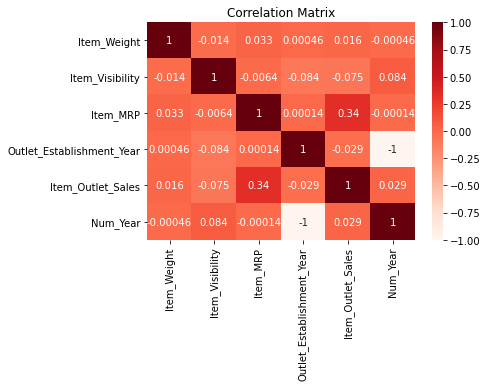

In [242]:
sns.heatmap(merged_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [243]:
train_dataset = merged_data.iloc[0:8523]
test_dataset = merged_data.iloc[8523:]

In [244]:
train_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Num_Year  
0     Supermarket Type1          3735.1380        14  
1     Supermarket Type2           443.4228         4  
2     Supermarket Type1          2097.2700        14  
3         Grocery Store           732.3800        15  
4     Supermarket Type1           994.7052        26  
...                 ...                ...       ...  
8518  Supermarket Type1          2778.3834        26  
8519  Supermarket Type1           549.2850        11  
8520  Supermarket Type1          1193.1136         9  
8521  Supermarket Type2          1845.5976         4  
8522  Supermarket Type1           765.6700        16  

[8523 rows x 13 columns]

In [245]:
test_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8523            FDW58    20.750000          Low Fat         0.007565   
8524            FDW14     8.300000          Regular         0.038428   
8525            NCN55    14.600000          Low Fat         0.099575   
8526            FDQ58     7.315000          Low Fat         0.015388   
8527            FDY38    12.792854          Regular         0.118599   
...               ...          ...              ...              ...   
14199           FDB58    10.500000          Regular         0.013496   
14200           FDD47     7.600000          Regular         0.142991   
14201           NCO17    10.000000          Low Fat         0.073529   
14202           FDJ26    15.300000          Regular         0.000000   
14203           FDU37     9.500000          Regular         0.104720   

                Item_Type  Item_MRP Outlet_Identifier  \
8523          Snack Foods  107.8622            OUT049   
8524                Dairy   87.3198            OUT017   
8525               Others  241.7538            OUT010   
8526          Snack Foods  155.0340            OUT017   
8527                Dairy  234.2300            OUT027   
...                   ...       ...               ...   
14199         Snack Foods  141.3154            OUT046   
14200       Starchy Foods  169.1448            OUT018   
14201  Health and Hygiene  118.7440            OUT045   
14202              Canned  214.6218            OUT017   
14203              Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8523                        1999      Medium               Tier 1   
8524                        2007      Medium               Tier 2   
8525                        1998      Medium               Tier 3   
8526                        2007      Medium               Tier 2   
8527                        1985      Medium               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002      Medium               Tier 2   
14202                       2007      Medium               Tier 2   
14203                       2002      Medium               Tier 2   

             Outlet_Type  Item_Outlet_Sales  Num_Year  
8523   Supermarket Type1                0.0        14  
8524   Supermarket Type1                0.0         6  
8525       Grocery Store                0.0        15  
8526   Supermarket Type1                0.0         6  
8527   Supermarket Type3                0.0        28  
...                  ...                ...       ...  
14199  Supermarket Type1                0.0        16  
14200  Supermarket Type2                0.0         4  
14201  Supermarket Type1                0.0        11  
14202  Supermarket Type1                0.0         6  
14203  Supermarket Type1                0.0        11  

[5681 rows x 13 columns]

In [246]:
print(train_dataset.shape, test_dataset.shape, merged_data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [247]:
test_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Num_Year'],
      dtype='object')

In [248]:
test = test_dataset.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis=1)
test.shape

(5681, 9)

In [249]:
test = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Size', 
            'Outlet_Location_Type', 'Outlet_Type','Num_Year']]

In [250]:
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Num_Year'],
      dtype='object')

In [251]:
X = train_dataset[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type','Num_Year']]
X.head(2)       

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.016047        Dairy  249.8092   
1         5.92          Regular         0.019278  Soft Drinks   48.2692   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Num_Year  
0      Medium               Tier 1  Supermarket Type1        14  
1      Medium               Tier 3  Supermarket Type2         4

In [252]:
y = train_dataset['Item_Outlet_Sales']
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [253]:
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Num_Year'],
      dtype='object')

## **Scaling down numerical data**

## **Encoding Categorical Features**

In [254]:
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Num_Year']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


## **Model Building**

In [255]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
X_train.shape, X_test.shape

((6818, 9), (1705, 9))

In [257]:
X_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Num_Year'],
      dtype='object')

In [258]:
X_train.head(5)

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
549         9.500          Regular         0.035206  Fruits and Vegetables   
7757       18.000          Low Fat         0.047473              Household   
764        17.600          Regular         0.076122                   Meat   
6867        8.325          Low Fat         0.029845  Fruits and Vegetables   
2716       12.850          Low Fat         0.137228            Snack Foods   

      Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  Num_Year  
549   171.3448      Medium               Tier 1  Supermarket Type1        14  
7757  170.5422      Medium               Tier 2  Supermarket Type1        11  
764   111.7202       Small               Tier 1  Supermarket Type1        16  
6867   41.6138      Medium               Tier 2  Supermarket Type1        11  
2716  155.5630       Small               Tier 1  Supermarket Type1        16

## **Linear Regression**

In [259]:
linear_reg_clf = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg_clf.fit(X_train, y_train)

y_pred = linear_reg_clf.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print("The R-squared value using Linear Regression :{}".format(linear_reg_r2_score))

The Mean Squared Error using Linear Regression :1142642.1587048604
The Root Mean Squared Error using Linear Regression :1068.9444132904482
The R-squared value using Linear Regression :0.5795972248777561


## **Decision Tree Regressor**

In [260]:
decision_tree_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree_clf.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree_clf.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred1)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The The Root Mean Squared Error Using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The R-squared value using Decision Tree :{}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 1080994.1933098442
The The Root Mean Squared Error Using Decision Tree Regressor : 1039.7087059892517
The R-squared value using Decision Tree :0.602278845309196


## **Random Forest Regressor**

In [261]:
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_regressor', RandomForestRegressor())])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 1215449.251829283
The The Root Mean Squared Error Using Random Forest Regressor : 1102.4741501864264
The R-squared value using Random Forest :0.5528099198891283


### Hyperparameter Tunning 

In [262]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_leaf=10,n_jobs=4,random_state=0))])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 1036498.922531734
The The Root Mean Squared Error Using Random Forest Regressor : 1018.0859111743636
The R-squared value using Random Forest :0.6186496182344097


In [263]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,max_depth=7, min_samples_leaf=85,n_jobs=4,random_state=0))])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 1033493.018826709
The The Root Mean Squared Error Using Random Forest Regressor : 1016.6085868350262
The R-squared value using Random Forest :0.6197555552503999


We can see that after hyperparameter tunning, r2_score improved (from 0.5546 to 0.6197) and RMSE also improved (taking it down from 1099 to 1016.60).

## **Gradient Boosting Regressor**

In [264]:
gradient_boosting_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('gradient_boosting_regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])

gradient_boosting_clf.fit(X_train, y_train)

y_pred3 = gradient_boosting_clf.predict(X_test)
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The The Root Mean Squared Error Using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The R-squared score using Gradient Boosting Regressor :{}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 1076925.8205503884
The The Root Mean Squared Error Using Gradient Boosting Regressor : 1037.750365237415
The R-squared score using Gradient Boosting Regressor :0.6037756876804294


## **Adaboost Regressor**

In [265]:
ada_boosting_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('adaboost_regressor', AdaBoostRegressor(n_estimators=100))])

ada_boosting_clf.fit(X_train, y_train)

y_pred4 = ada_boosting_clf.predict(X_test)

# Evaluation Metrics
adaboost_mse = mean_squared_error(y_test, y_pred4)
adaboost_rmse = mean_squared_error(y_test, y_pred4, squared=False)
ada_boosting_r2_score = r2_score(y_test, y_pred4)

print("The Mean Squared Error using Adaboost Regressor : {}".format(adaboost_mse))
print("The The Root Mean Squared Error Using Adaboost Regressor : {}".format(adaboost_rmse))
print("The R-squared score using Adaboost Regressor :{}".format(ada_boosting_r2_score))

The Mean Squared Error using Adaboost Regressor : 1259533.789664136
The The Root Mean Squared Error Using Adaboost Regressor : 1122.2895302301167
The R-squared score using Adaboost Regressor :0.5365902645013381


##  **XGBoost Regressor**

In [266]:
xg_boost_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('xgb_regressor', xgb.XGBRegressor())])

xg_boost_clf.fit(X_train, y_train)

y_pred5 = xg_boost_clf.predict(X_test)

# Evaluation Metrics
xgboost_mse = mean_squared_error(y_test, y_pred5)
xgboost_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgboost_r2_score = r2_score(y_test, y_pred5)

print("The Mean Squared Error using XGBoost Regressor : {}".format(xgboost_mse))
print("The The Root Mean Squared Error Using XGBoost Regressor : {}".format(xgboost_rmse))
print("The R-squared score using XGBoost Regressor :{}".format(xgboost_r2_score))

The Mean Squared Error using XGBoost Regressor : 1267988.4885085938
The The Root Mean Squared Error Using XGBoost Regressor : 1126.049949384393
The R-squared score using XGBoost Regressor :0.5334795978504054


### Hyperparameter tunning

In [267]:
xg_boost_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('xgb_regressor', xgb.XGBRegressor(objective= 'reg:linear', max_depth= 4, n_estimators=10, alpha=10))])

xg_boost_clf.fit(X_train, y_train)

y_pred5 = xg_boost_clf.predict(X_test)

# Evaluation Metrics
xgboost_mse = mean_squared_error(y_test, y_pred5)
xgboost_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgboost_r2_score = r2_score(y_test, y_pred5)

print("The Mean Squared Error using XGBoost Regressor : {}".format(xgboost_mse))
print("The The Root Mean Squared Error Using XGBoost Regressor : {}".format(xgboost_rmse))
print("The R-squared score using XGBoost Regressor :{}".format(xgboost_r2_score))

[03:30:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
The Mean Squared Error using XGBoost Regressor : 1054058.3822040057
The The Root Mean Squared Error Using XGBoost Regressor : 1026.6734545141437
The R-squared score using XGBoost Regressor :0.6121891130625741


## **Support Vector Machine**

In [268]:
svm_clf = Pipeline(steps=[('preprocessor', preprocessor),
('supoort_vector_regressor', SVR())])

svm_clf.fit(X_train, y_train)

y_pred6 = svm_clf.predict(X_test)

# Evaluation Metrics
svm_mse = mean_squared_error(y_test, y_pred6)
svm_rmse = mean_squared_error(y_test, y_pred6, squared=False)
svm_r2_score = r2_score(y_test, y_pred6)

print("The Mean Squared Error using Support Vector Machine : {}".format(svm_mse))
print("The Root Mean Squared Error using Support Vector Machine : {}".format(svm_rmse))
print("The R-squared score using Support Vector Machine :{}".format(svm_r2_score))

The Mean Squared Error using Support Vector Machine : 2493298.5795366154
The Root Mean Squared Error using Support Vector Machine : 1579.0182328068968
The R-squared score using Support Vector Machine :0.08266150162565022


In [269]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree',
              'Random Forest', 'Gradient Boosting',
              'Adaboosting', 'XGBoost', 
              'Support Vector Machines'],
    'RMSE': [linear_reg_rmse, decision_tree_rmse, random_forest_rmse, 
              gradient_boosting_rmse, adaboost_rmse, 
              xgboost_rmse, svm_rmse],
    'r2_score': [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, ada_boosting_r2_score,
                gradient_boosting_r2_score, xgboost_r2_score, svm_r2_score]})
models.sort_values(by='RMSE', ascending=True)


Model         RMSE  r2_score
2            Random Forest  1016.608587  0.619756
5                  XGBoost  1026.673455  0.612189
3        Gradient Boosting  1037.750365  0.536590
1            Decision Tree  1039.708706  0.602279
0        Linear Regression  1068.944413  0.579597
4              Adaboosting  1122.289530  0.603776
6  Support Vector Machines  1579.018233  0.082662

Random Forest model gives low RMSE score and good R-squared score. So we will perform model prediction using Random Forest Regressor.

In [270]:
pickle.dump(rf_clf, open('random_forest_regression_model.pkl', 'wb'))

 **Predicting Test Dataset**

In [271]:
predictions=rf_clf.predict(test)
predictions

array([1618.05657419, 1377.60113195,  568.99414546, ..., 1919.39061934,
       3576.66839171, 1304.0621773 ])

**Saving the Predictions**

In [272]:
predictions=pd.DataFrame(predictions)

In [273]:
predictions.to_csv('test_predictions.csv')